In [23]:
# Initialize Otter
import otter
grader = otter.Notebook("csc475-575-Spring2022-assignment1.ipynb")

# CSC475/575 Spring 2022 - Assignment 1A 

This assignment covers topics related to extracting information from audio signals. Information about the course can be found at the 
[CSC475/575 Brightspace](https://bright.uvic.ca/d2l/home/196001). 


* A1.1: Harmonics 
* A1.2: Complex number addition/multiplication  
* A1.3: Generate clock hands and complex number plotting  
* A1.4: Triangle wave generation 
* A1.5: MIDI synth with sines, triangle waves and ADSR 

CSC575 only: 
* A1.G: Sine, Triangle, Square wave detector

Each question is worth 2 points for a total of 10 points for the assignment. 


In [47]:
import numpy as np
import random
import IPython.display as ipd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import otter
grader = otter.Notebook()


**Question A1.1 (basic):** 

Write a function `seven_harmonics` that takes the same parameters as the `create_sinusoid` function i.e amp, freq, duration, and sample_rate and similary generates an audio signal. The resulting 
audio signal should have the following characteristics: the duration is 5 * duration with the first second containing a sine wave of the specified frequency f, then during the 2nd second a sinusoid with frequency 2 * f (harmonic) is added, then during the 3rd second a a sinusoid with frequency 3 * f is added, and so forth. The amplitude of each harmonic should be amp / (1+hnum) where hnum is between 0 and 7. Call your function with a duration of 1 second (the resulting signal should be 5 seconds), an amplitude of 0.5, and a frequency of 220Hz and then plot and hear the result. Also make sure that your function works correctly for different durations, amplitudes, and frequencies. 


In [48]:
def create_sinusoid(amp, freq, duration, sample_rate):
    t = np.arange(0, duration, 1.0 / sample_rate)
    return amp * np.sin(2 * np.pi * freq * t)

In [50]:
# complete the function seven_harmonics according 
# to the specification above 

def seven_harmonics(amp, freq, duration, sample_rate):
    single_num=np.linspace(0,duration,duration*sample_rate).shape[0]
    single_data=np.zeros(single_num)
    singles=[]
    for i in range(7):
        f=(i+1)*freq
        single_data=single_data+create_sinusoid(amp / (1+i), f, duration, sample_rate)
        singles=np.append(singles,single_data)
    return singles

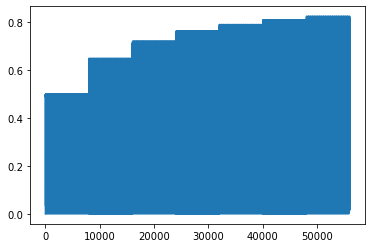

In [51]:
# use the code in this cell to plot/listen to the resulting 
# signal of the seven_harmonics function 
f0 = 220
sr = 8000
amp = 0.5
duration = 1 

signal = seven_harmonics(amp, f0, duration, sr)
plt.plot(np.abs(signal))
ipd.Audio(signal, rate=sr)

In [52]:
grader.check("A1.1")

A1.1 results: All test cases passed!

**Question A1.2 (basic):** 

In this question we will explore complex number addition and multiplication using different representations. Python has built-in support for complex numbers. The complex number $c=a+ib$ has real part $a$ and imaginary part $b$. In Python the symbol $j$ is used to instead of $i$. Here is some Python code for creeating a complex number and doing mathematical operations with them. 

In [53]:
c = 0.5 + 2*1j
print(c)
# alternatively the Complex constructor can be used 
c = complex(0.5,2)
print(c)

d = 0.5 + 0.5*1j
# We can also add/multiply complex numbers 
print(c+d)
print(c*d)
print(np.real(c))
print(np.imag(c))

(0.5+2j)
(0.5+2j)
(1+2.5j)
(-0.75+1.25j)
0.5
2.0


Your task is to write your own implementation of complex numbers and associated operations on them (`complex_add`, `complex_multiply`) using a dictionary to represent them. For example: 
c = {'Re': 0.5, 'Im': 2}. Also write a function `from_polar` that takes as input a radial distance R and an angle theta and return the corresponding complex number. 


In [54]:
c = {'Re': 0.5, 'Im': 2} 
d = {'Re': 0.5, 'Im': 0.5}

print(c['Re'])
print(c['Im'])

def complex_add(c1, c2): 
    res_re=c1['Re']+c2['Re']
    res_im=c1['Im']+c2['Im']
    res = {'Re':res_re,'Im':res_im}
    return res


def complex_mul(c1, c2): 
    res_re=c1['Re']*c2['Re']-c1['Im']*c2['Im']
    res_im=c1['Re']*c2['Im']+c2['Re']*c1['Im']
    res = {'Re':res_re,'Im':res_im}
    return res

def from_polar(r,theta): 
    res_re=r*np.cos(theta)
    res_im=r*np.sin(theta)
    res = {'Re':res_re,'Im':res_im}
    return res

print(complex_add(c,d))
print(complex_mul(c,d))
print(from_polar(1,0))
print(complex_mul(from_polar(1,0), {'Re':0,'Im':1}))

0.5
2
{'Re': 1.0, 'Im': 2.5}
{'Re': -0.75, 'Im': 1.25}
{'Re': 1.0, 'Im': 0.0}
{'Re': 0.0, 'Im': 1.0}


In [55]:
grader.check("A1.2")

A1.2 results: All test cases passed!

**Question A1.3 (expected):** 

Write a function `clock_hand_positions` that takes as input an integer number and returns a list of complex numbers corresponding to clock hand positions dividing the unit circle into equal angles. For example `clock_hand_positions(4)` would return 4 complex numbers with the first one being the unit length vector at 0 angle (3 on clock face), the second one being the unit length vector at pi/2 (12 on a clock face), the third one at -1 (9 on a clock face) and the last one at -j (6 on a clock face). Check using the plotting code below that your function works as expected. 

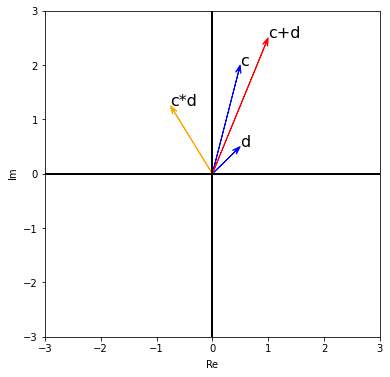

In [34]:
def plot_complex(c, text = '', xlim=[-3,3], ylim=[-3,3], 
                 color='black', linestyle='-'):
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.text(np.real(c), np.imag(c), text, size='16')

    plt.xlabel(r'$\mathrm{Re}$')
    plt.ylabel(r'$\mathrm{Im}$')
    plt.arrow(0.0, 0.0, np.real(c), np.imag(c),
              head_width=0.1, fc=color, ec=color,
              overhang=0.5, length_includes_head=True)
    
figsize = (6,6)
plt.figure(figsize=figsize)
c = 0.5 + 2j
d = 0.5 + 0.5*1j

plot_complex(c, text='c', linestyle='|',color='blue')
plot_complex(d, text='d', color='blue')
plot_complex(c+d, text='c+d', color='red')
plot_complex(c*d, text='c*d', color='orange')

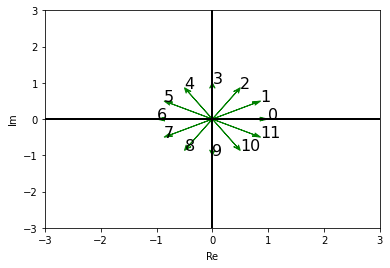

In [35]:
def clock_hand_positions(nhands): 
    angle=np.linspace(0,360,nhands+1)
    res=[]
    aver=360/nhands
    for ang in range(nhands):
        theta=(ang*aver/360)*2*np.pi
        re_im=from_polar(1,theta)
        re=re_im['Re']
        im=re_im['Im']
        res.append(re+im*1j)
    return res 

clist1 = clock_hand_positions(12)

# Use a plot to check your solution 
for (n,c) in enumerate(clist1): 
    plot_complex(c, text=str(n), linestyle='|',color='green')


In [12]:
grader.check("A1.3")

A1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question A1.4 (expected):** 

Write a function `generate_triangle` that takes as argument a MIDI note number and duration (floating point and in seconds) and creates a triangle wave signal with the corresponding frequency and duration. A triangle wave can be created by summing sinusoidal signals with appropriate frequencies (https://en.wikipedia.org/wiki/Triangle_wave). The function should also take as input the number of sinusoids used for the approximation. The triangle wave signal returned should be at audio rate.

You can use the follwing formulate to convert MIDI note numbers to frequencies and the order of arguments for the function and an example of calling it are provided below in comments. There is also code in the comments to show 
how by adding additional harmonics we get closer to a true triangle wave. 


In [13]:
def midi_to_freq(pitch):
    return 440*(2**((pitch-69)/12.0))

In [14]:
def generate_triangle(pitch, nharmonics, dur=1.0, amp=1.0, sr=44100):   
    def get_sin(A0,f0,P0,N,fs):
        t=np.arange(0,N/fs,1/fs)
        return A0*np.sin(2*np.pi*f0*t+P0)
    b=midi_to_freq(pitch)
    a=np.arange(1,b,2)
    PanSin=[]
    for i in range(nharmonics):
        f0=a[i]*b
        xt=get_sin(amp,f0,np.pi/2,dur*sr,sr)/(a[i]**2)
        PanSin.append(xt)
    triangle_signal=sum(PanSin)
    return triangle_signal

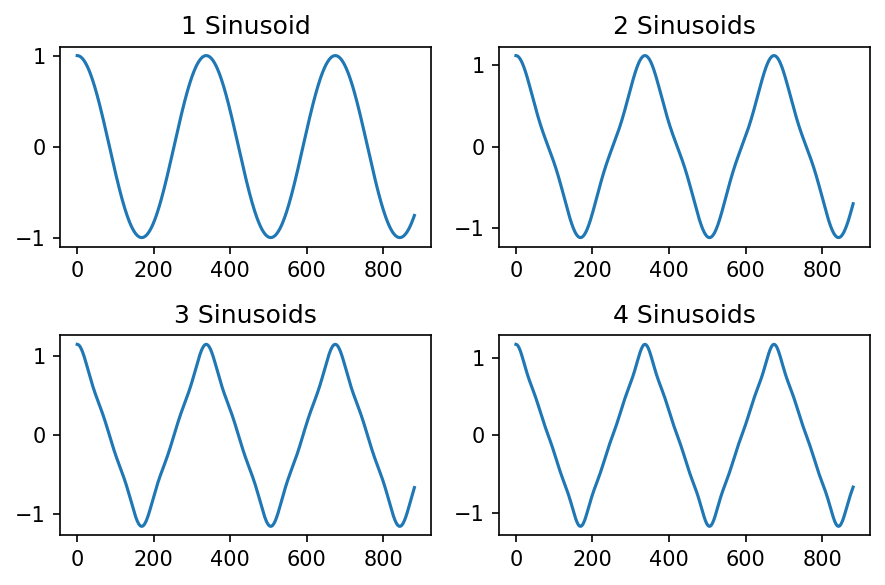

In [15]:
# code to check how your function works 

signal = generate_triangle(48, 25)
ipd.Audio(signal, rate=44100)


x1 = generate_triangle(48, 1, 0.02)
x2 = generate_triangle(48, 2, 0.02)
x3 = generate_triangle(48, 3, 0.02)
x4 = generate_triangle(48, 4, 0.02)

fig, axs = plt.subplots(2,2, dpi=150)
axs[0,0].plot(x1)
axs[0,0].set_title('1 Sinusoid')
axs[0,1].plot(x2)
axs[0,1].set_title('2 Sinusoids')
axs[1,0].plot(x3)
axs[1,0].set_title('3 Sinusoids')
axs[1,1].plot(x4)
axs[1,1].set_title('4 Sinusoids')

fig.tight_layout()
    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A1.5 (advanced):** 

This question requires significantly more work than the other questions and also is more open ended. 

The goal in this question is to create a simple synthesizer that can be used to play music pieces. 
You might have noticed that when we create pitched sounds either using single sinusoids or the triangular 
wave generator they start somewhat abruptly. The solution to this problem is to apply an amplitude 
envelope to the generated sounds (this was also done in the THX sound example we explored earlier in the class). 

Read about signal envelopes: https://en.wikipedia.org/wiki/Envelope_(music) and implement an ADSR envelope 
generator that can be multiplied with an audio signal to provide smoother attacks and releases. The ADSR envelope genrator should take as input the duration and have the amplitude target points and corresponding times 
be expressed as percentages of 1.0 for the amplitude and of the duration for the points. 

Show how you can render a simple melody initially using non-enveloped signals and then using enveloped signals. 
Provide both audio examples and plots showing how your ADSR works. 

Implement a way to provide a music score and render it using your ADSR-enveloped notes using the triangle wave generator. There are different ways to go about this and it is up to you how you encode the information. Here are 
some suggestions: 

1. Come up with your own format 
2. Use SKINI https://ccrma.stanford.edu/software/stk/skini.html
3. Use MIDI files and the mido Python library to parse them 
4. The Music21 tiny notation format https://web.mit.edu/music21/doc/usersGuide/usersGuide_16_tinyNotation.html


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A1.G (CSC575/advanced):** 

This question only needs to be answered by graduate students who are registered in CSC575 and for these students it will be graded instead of question A1.1 which is optional for them. 

Write a function that detects whether an audio recording of a single note is a single sinusoid, a sum of sinusoids approximation of a triangle wave, or a sum of sinusoids approximation of a square wave. You can assume you know the frequecy and the phase of the single note and that at least 3 harmonics are used for the approximations. Base your solution on the method of measuring amplitude by taking the dot-product with a sinusoidal basis function. Extend your solution to work without the assumption that the basis function and the note have the same phase using a pair of sine and cosine basis funcation to estimate the amplitude. 


In [16]:
# Your great detector of waveform type 

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [46]:
grader.check_all()

A1.1 results: All test cases passed!

A1.2 results: All test cases passed!

A1.3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export()